# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np



# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + Random Forest/NB

Task 1: Use X_train, y_train to train a NB gaussian classifier or random forest (SKlean's built in methods) with the deafult parameters. You can read more about the algorithms in SKlearn's documentation.
Make sure you normalize the data by using StandardScaler.

Evaulate the algorithm using accuracy score on (X_test, y_test).

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)



In [5]:
#Train a model
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_sc, y_train)
y_pred_rf = forest.predict(X_test_sc)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest accuracy: {accuracy:.4f}")

RandomForest accuracy: 0.9722


Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.


Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of NB/RF + PCA.

Answer 1. When PCA is used with the maximal number of components, essentially retains all the original information in the data. By keeping all the variance, PCA ensures that no significant information is lost during the transformation. Therefore, the model trained on the reduced-dimensional data should ideally perform as well as or even better than the model trained on the original data.

In [6]:
pca = PCA()
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

#Train a model Random Forest
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_pca, y_train)
y_pred_rf_pca = forest.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_rf_pca)
print(f"RandomForest + PCA accuracy: {accuracy:.4f}")


RandomForest + PCA accuracy: 0.9306


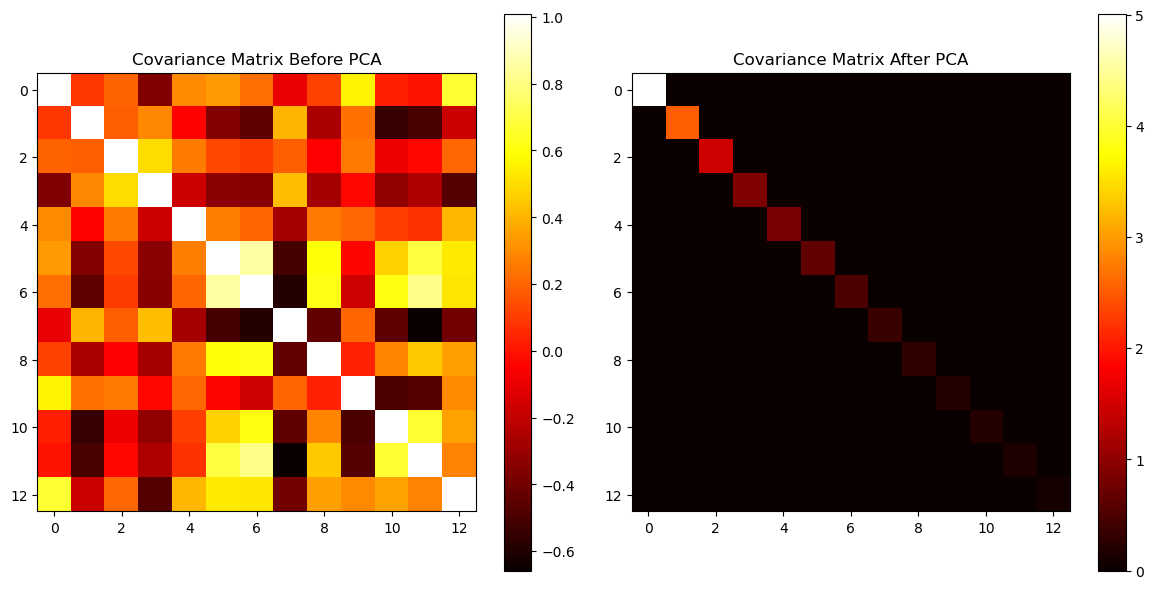

In [7]:
# Compute covariance matrix before PCA
cov_before_pca = np.cov(X_train_sc, rowvar=False)

# Compute covariance matrix after PCA
cov_after_pca = np.cov(X_train_pca, rowvar=False)

# Plot covariance matrix before PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cov_before_pca, cmap='hot', interpolation='nearest')
plt.title('Covariance Matrix Before PCA')
plt.colorbar()

# Plot covariance matrix after PCA
plt.subplot(1, 2, 2)
plt.imshow(cov_after_pca, cmap='hot', interpolation='nearest')
plt.title('Covariance Matrix After PCA')
plt.colorbar()

plt.tight_layout()
plt.show()


Q2: Did the results improve\stayed the same\got worse?

We got worse results. By including all components, there's a risk of introducing noise or irrelevant information into the Random Forest (RF) model, potentially undermining its performance. Additionally, the indiscriminate inclusion of components may elevate the risk of overfitting, particularly if the retained number of components is excessively high.

# PCA + logistic regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [8]:
# Task 3: repeat task 1 with logistic regression.
# build a model
model_lr = LogisticRegression()
model_lr.fit(X_train_sc, y_train)
y_pred_lr = model_lr.predict(X_test_sc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LogisticRegression accuracy: {accuracy:.4f}")

#Task 4: repeast task 2 with logistic regression.
# build a model
model_lr_pca = LogisticRegression()
model_lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = model_lr_pca.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr_pca)
print(f"LogisticRegression + PCA accuracy: {accuracy:.4f}")

LogisticRegression accuracy: 0.9861
LogisticRegression + PCA accuracy: 0.9861


Q3: Did the results improved\stayed the same\got worse?

Accuracy score improved after applying LogisticRegression.

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of the model used in Q2 from it.

Logistic Regression is a linear model that assumes a linear relationship between the features and the target. Even without reducing dimensionality, PCA can still reduce multicollinearity by transforming the original features into a set of orthogonal (uncorrelated) principal components. This can enhance the stability of the coefficients estimated by Logistic Regression and improve its interpretability. In contrast, Random Forest is an ensemble learning method that constructs multiple decision trees. It's capable of capturing complex, non-linear relationships in the data. 

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

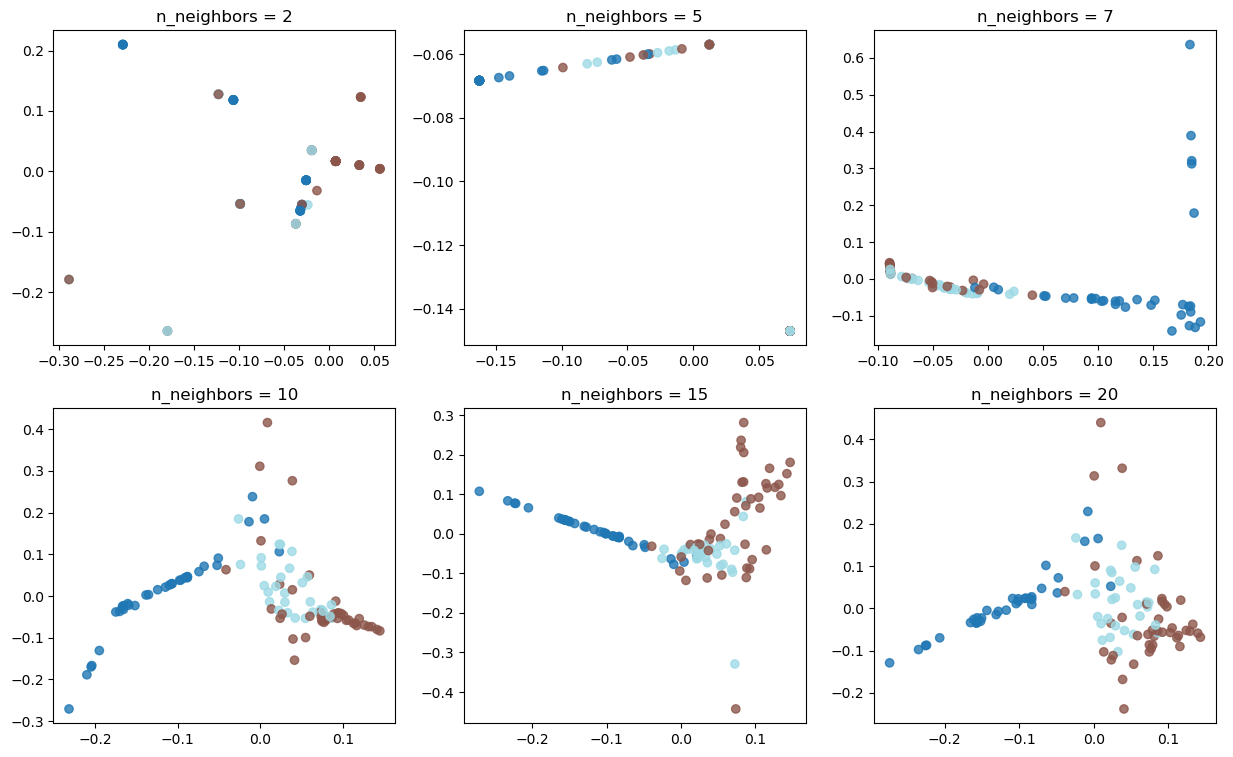

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt


plt.figure(figsize=(15,9))
i = 1

for n in [2, 5, 7, 10, 15, 20]:
    embedding = LocallyLinearEmbedding(n_neighbors=n)
    X_transformed_lle = embedding.fit_transform(X_train)
    plt.subplot(2,3,i)
    plt.scatter(X_transformed_lle[:, 0], X_transformed_lle[:, 1], c=y_train, alpha=0.8, cmap='tab20')
    plt.title(f'n_neighbors = {n}')
    i += 1

Task 6: Use t-SNE to visualize the data. Plot the results.

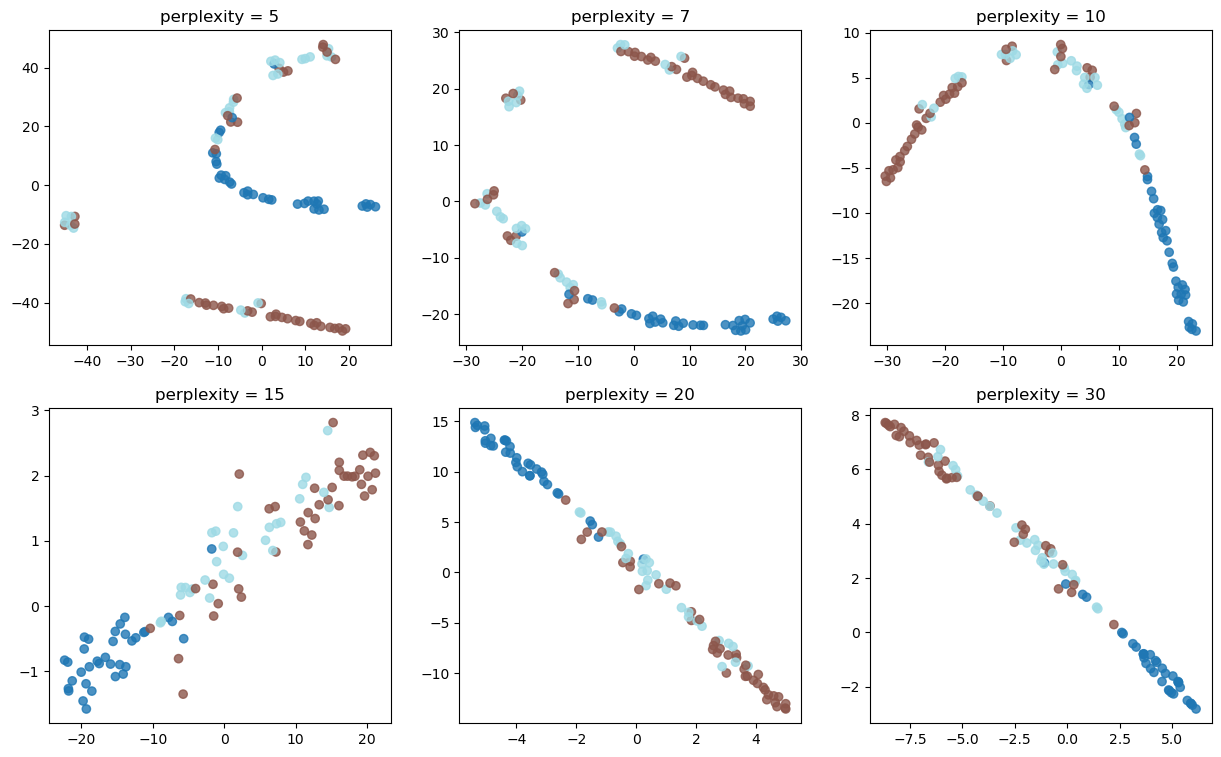

In [23]:
from sklearn.manifold import TSNE

plt.figure(figsize=(15,9))
i = 1

for n in [5, 7, 10, 15, 20, 30]:
    tsne=TSNE(perplexity=n) 
    X_transformed_tnse = tsne.fit_transform(X_train)
    plt.subplot(2,3,i)
    plt.scatter(X_transformed_tnse[:, 0], X_transformed_tnse[:, 1], c=y_train, alpha=0.8, cmap='tab20')
    plt.title(f'perplexity = {n}')
    i += 1

Task 7: Use UMAP to visualize the data. Plot the results.

In [ ]:
import umap
umap = umap.UMAP()
X_transformed_umap = umap.fit_transform(X_train)
plt.scatter(X_transformed_umap[:, 0], X_transformed_umap[:, 1], c=y_train, alpha=0.8, cmap='tab20')
plt.title(f'UMAP')

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

No, those algorithms with default parameters don't guarantee the same results because of the randomness during the initialization and optimization process. But it is possible to set random seed for reproducibility.